# Hits visualization

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
from trackml.dataset import load_event
import seaborn as sns
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")


# Path to events data
path2data = '/home/alepfu/Desktop/dataset/train_100_events/'

# Event filename prefix
event_id = 'event000001000'

# Load dataset
hits, cells, particles, truth = load_event(path2data + event_id)

# Merge hits and truth
hits_truth = pd.merge(truth, pd.DataFrame(hits), on = ['hit_id']).loc[:,["hit_id", "particle_id", "x", "y", "z"]]

# Add R = sqrt(x^2 + y^2) column 
hits_truth['r'] = hits_truth.apply(lambda hit: np.sqrt(hit['x']**2 + hit['y']**2), axis=1)

### X-Y, X-Z and Y-Z plots

Showing 2.48% of total hits


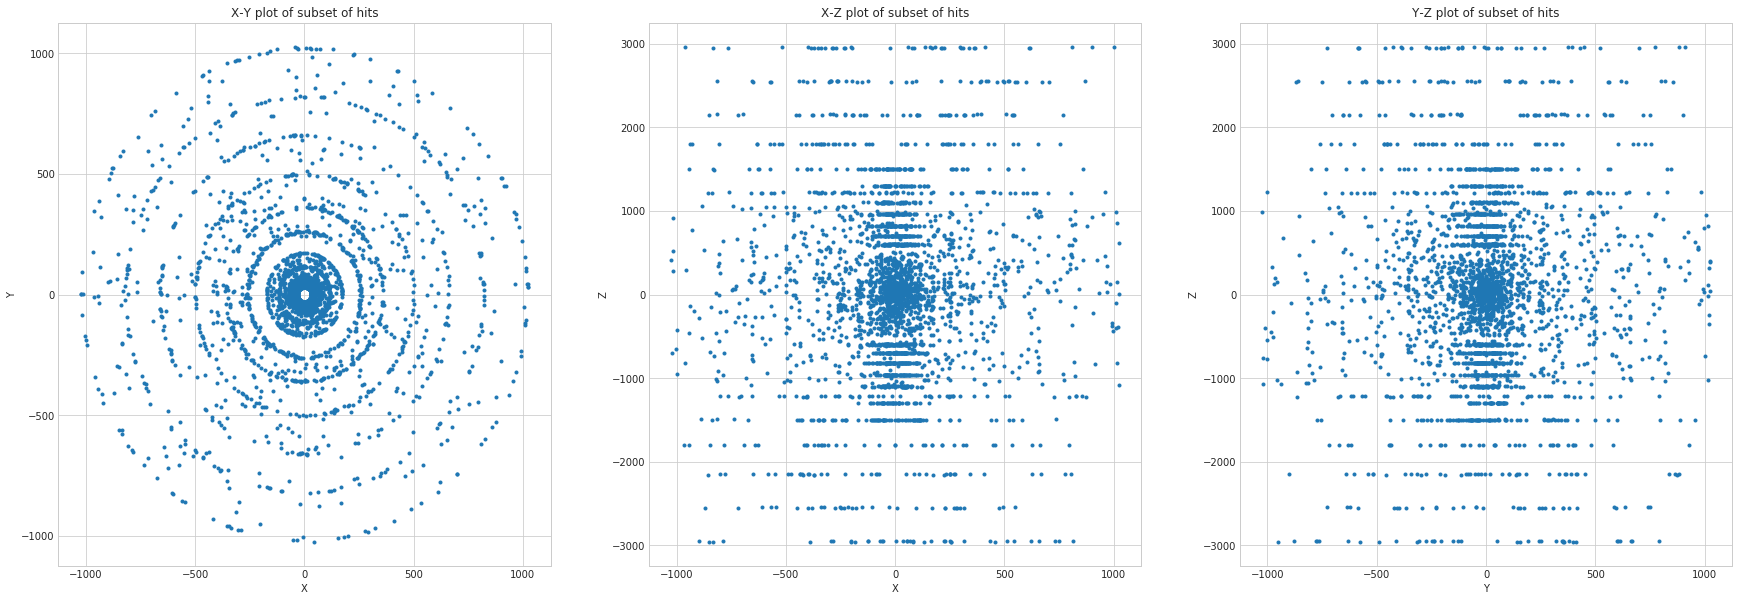

In [23]:
N_viz = 3000
random_hits = random.sample(range(len(hits_truth.hit_id)), N_viz)
subset = hits_truth.loc[random_hits]
print("Showing %.2f%% of total hits" % (round(100 * N_viz / float(len(hits_truth.hit_id.values)), 2)))

fig = plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.plot(subset.x, subset.y,".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X-Y plot of subset of hits")

plt.subplot(1,3,2)
plt.plot(subset.x, subset.z,".")
plt.xlabel("X")
plt.ylabel("Z")
plt.title("X-Z plot of subset of hits")

plt.subplot(1,3,3)
plt.plot(subset.y, subset.z,".")
plt.xlabel("Y")
plt.ylabel("Z")
plt.title("Y-Z plot of subset of hits")

plt.show()

### Z-R plot

Showing 2.48% of total hits


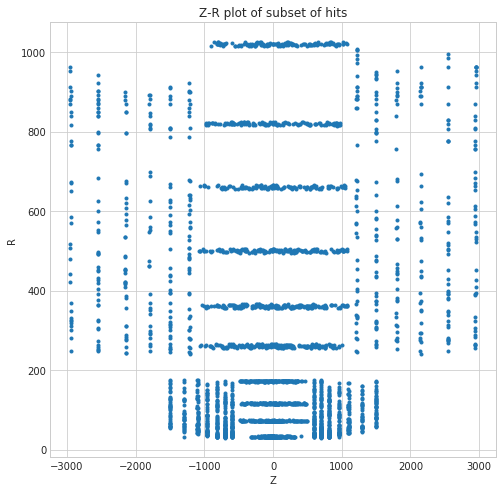

In [24]:
random_hits = random.sample(range(len(hits_truth.hit_id)), N_viz)

subset = hits_truth.loc[random_hits]
print("Showing %.2f%% of total hits" % (round(100 * N_viz / float(len(hits_truth.hit_id.values)), 2)))
fig = plt.figure(figsize=(8,8))
plt.plot(subset.z, subset.r,".")
plt.xlabel("Z")
plt.ylabel("R")
plt.title("Z-R plot of subset of hits")
plt.show()

### 3D plot

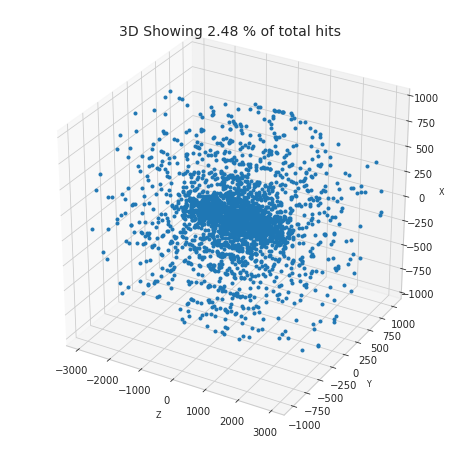

In [25]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(subset.z, subset.y, subset.x, ".")
ax.set_xlabel('Z', fontsize=8)
ax.set_ylabel('Y', fontsize=8)
ax.set_zlabel('X', fontsize=8)
plt.title("3D Showing " + str(round(100*N_viz/float(len(hits_truth.hit_id.values)),2)) + " % of total hits", fontsize=14)
plt.show()